##### Notebook 1

# Unemployment in Spain : A predictive Analysis

In [333]:
# Standard Libraries
from datetime import datetime
from collections import Counter

# Data Analysis and Manipulation
import numpy as np
import pandas as pd
from scipy import stats

# Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots

# Miscellaneous
import locale

##### Importing Data

In [334]:
### This set of datasets contain Unemployment in Spain from 2006 to 2023 by year

In [335]:
p06 = pd.read_csv('Paro_por_municipios_2006_csv.csv', delimiter=";", index_col=0).reset_index(drop =True)

In [336]:
p07 = pd.read_csv('Paro_por_municipios_2007_csv.csv', delimiter=";", index_col=0).reset_index(drop =True)

In [337]:
p08 = pd.read_csv('Paro_por_municipios_2008_csv.csv', delimiter=";", index_col=0).reset_index(drop =True)

In [338]:
p09 = pd.read_csv('Paro_por_municipios_2009_csv.csv', delimiter=";", index_col=0).reset_index(drop =True)

In [339]:
p10 = pd.read_csv('Paro_por_municipios_2010_csv.csv', delimiter=";", index_col=0).reset_index(drop =True)

In [340]:
p11 = pd.read_csv('Paro_por_municipios_2011_csv.csv', delimiter=";", index_col=0).reset_index(drop =True)

In [341]:
p12 = pd.read_csv('Paro_por_municipios_2012_csv.csv', delimiter=";", index_col=0).reset_index(drop =True)

In [342]:
p13 = pd.read_csv('Paro_por_municipios_2013_csv.csv', delimiter=";", index_col=0).reset_index(drop =True)

In [343]:
p14 = pd.read_csv('Paro_por_municipios_2014_csv.csv', delimiter=";", index_col=0).reset_index(drop =True)

In [344]:
p15 = pd.read_csv('Paro_por_municipios_2015_csv.csv', delimiter=";", index_col=0).reset_index(drop =True)

In [345]:
p16 = pd.read_csv('Paro_por_municipios_2016_csv.csv', delimiter=";", index_col=0).reset_index(drop =True)

In [346]:
p17 = pd.read_csv('Paro_por_municipios_2017_csv.csv', delimiter=";", index_col=0).reset_index(drop =True)

In [347]:
p18 = pd.read_csv('Paro_por_municipios_2018_csv.csv', delimiter=";", index_col=0).reset_index(drop =True)

In [348]:
p19 = pd.read_csv('Paro_por_municipios_2019_csv.csv', delimiter=";", index_col=0).reset_index(drop =True)

In [349]:
p20 = pd.read_csv('Paro_por_municipios_2020_csv.csv', delimiter=";", index_col=0).reset_index(drop =True)

In [350]:
p21 = pd.read_csv('Paro_por_municipios_2021_csv.csv', delimiter=";", index_col=0).reset_index(drop =True)

In [351]:
p22 = pd.read_csv('Paro_por_municipios_2022_csv.csv', delimiter=";", index_col=0).reset_index(drop =True)

In [352]:
p23 = pd.read_csv('Paro_por_municipios_2023_csv.csv', delimiter=";", index_col=0).reset_index(drop =True)

In [353]:
## We now proceed to merge all datasets into one dataframe 

In [354]:
paros = pd.concat([p06, p07, p08, p09, p10, p11, p12, p13, p14, p15, p16, p17, p18, p19, p20, p21, p22, p23],  ignore_index= True)

paros.index +=1

In [355]:
paros.head()

,mes,Código de CA,Comunidad Autónoma,Codigo Provincia,Provincia,Codigo Municipio,Municipio,total Paro Registrado,Paro hombre edad < 25,Paro hombre edad 25 -45,Paro hombre edad >=45,Paro mujer edad < 25,Paro mujer edad 25 -45,Paro mujer edad >=45,Paro Agricultura,Paro Industria,Paro Construcción,Paro Servicios,"Paro Sin empleo Anterior,,,"
1,Enero de 2006,1,Andalucía,4,Almería,4001,Abla,56,5,11,12,2,23,3,10,6,9,27,"4,,,"
2,Enero de 2006,1,Andalucía,4,Almería,4002,Abrucena,50,3,16,15,6,10,0,7,6,7,26,"4,,,"
3,Enero de 2006,1,Andalucía,4,Almería,4003,Adra,775,73,168,97,72,280,85,138,36,103,451,"47,,,"
4,Enero de 2006,1,Andalucía,4,Almería,4004,Albánchez,14,0,7,3,0,2,2,1,6,2,4,"1,,,"
5,Enero de 2006,1,Andalucía,4,Almería,4005,Alboloduy,24,2,6,0,6,9,1,1,1,5,14,"3,,,"


In [356]:
# Before making any changes, a copy of the original data is kept to preserve data integrity.
# Create a copy of the original data
paros_original = paros.copy()

## Clean-up

##### Data was collected in Spanish version. We proceed to translate Dataframe Columns to English

In [357]:
## This code snippet contains two separate column renaming operations on the 'paros' DataFrame using two dictionaries defining the old and new column names. The second renaming (to 'paros_df') seems redundant and potentially incorrect because the first renaming has already changed the column names. Moreover, the column names in the second renaming operation don't match with the updated column names from the first operation, which might cause errors or non-effective renaming. To optimize, you can remove the redundancy by choosing appropriate column names in a single renaming operation. Also, 'update with cap letters' is instructing to update the column names with capitalized letters for better consistency and readability.
paros = paros.rename(columns={
                    'mes' : 'Date',
                    'Código de CA' : 'AC_code',
                    'Comunidad Autónoma' : 'Autonomus_Community',
                    'Codigo Provincia' : 'Province_code',
                    'Provincia' : 'Province',
                    'Codigo Municipio' : 'Municipality_code',
                    ' Municipio' : 'Municipality',
                    'total Paro Registrado': 'Total_unemployment',
                    'Paro hombre edad < 25' : 'Unemployed_man_age_<25',
                    'Paro hombre edad 25 -45 ' : 'Unemployed_man_age_25_45',
                    'Paro hombre edad >=45' : 'Unemployed_man_age_45',
                    'Paro mujer edad < 25' : 'Unemployed_women_age_25',
                    'Paro mujer edad 25 -45 ' : 'Unemployed_women_age_25_45',
                    'Paro mujer edad >=45' : 'Unemployed_woman_age_45',
                    'Paro Agricultura' : 'Unemployment_agriculture',
                    'Paro Industria' : 'Unemployment_industry',
                    'Paro Construcción' : 'Unemployment_construction',
                    'Paro Servicios' : 'Unemployment_services',
                    'Paro Sin empleo Anterior,,,' : 'Unemployment_without_previous_employment',
                    
}, errors='ignore')



In [358]:
## This line of code sets the maximum number of displayable columns to "unlimited", allowing all columns in the DataFrame to be visible when printed.
pd.set_option('display.max_columns', None)


In [359]:
paros.head()

,Date,AC_code,Autonomus_Community,Province_code,Province,Municipality_code,Municipality,Total_unemployment,Unemployed_man_age_<25,Unemployed_man_age_25_45,Unemployed_man_age_45,Unemployed_women_age_25,Unemployed_women_age_25_45,Unemployed_woman_age_45,Unemployment_agriculture,Unemployment_industry,Unemployment_construction,Unemployment_services,Unemployment_without_previous_employment
1,Enero de 2006,1,Andalucía,4,Almería,4001,Abla,56,5,11,12,2,23,3,10,6,9,27,"4,,,"
2,Enero de 2006,1,Andalucía,4,Almería,4002,Abrucena,50,3,16,15,6,10,0,7,6,7,26,"4,,,"
3,Enero de 2006,1,Andalucía,4,Almería,4003,Adra,775,73,168,97,72,280,85,138,36,103,451,"47,,,"
4,Enero de 2006,1,Andalucía,4,Almería,4004,Albánchez,14,0,7,3,0,2,2,1,6,2,4,"1,,,"
5,Enero de 2006,1,Andalucía,4,Almería,4005,Alboloduy,24,2,6,0,6,9,1,1,1,5,14,"3,,,"


In [360]:
## Cleaning rows with excesive "," usage ##
paros['Unemployment_without_previous_employment'] = paros['Unemployment_without_previous_employment'].str.replace(',', '')

In [361]:
## This line of code retrieves the shape of the 'paros' DataFrame, returning a tuple where the first element is the number of rows and the second element is the number of columns.
paros.shape

(1689436, 19)

In [362]:
## Verifying that merged datasets are continuos according to the vertical index 
paros.loc[97402:97415, ["Date", "Province", "Total_unemployment"]]

,Date,Province,Total_unemployment
97402,Diciembre de 2006,"Rioja, La",1
97403,Diciembre de 2006,Ceuta,6704
97404,Diciembre de 2006,Melilla,6076
97405,Enero de 2007,Almería,70
97406,Enero de 2007,Almería,55
97407,Enero de 2007,Almería,844
97408,Enero de 2007,Almería,11
97409,Enero de 2007,Almería,29
97410,Enero de 2007,Almería,330
97411,Enero de 2007,Almería,31


##### Dealing with Date column

In [363]:
# This block of code first sets the locale to Spanish ('es_ES.UTF-8'), which affects how dates and time are formatted and presented.
locale.setlocale(locale.LC_TIME, 'es_ES.UTF-8')

# Convert 'Date' column to datetime objects with the format "%B de %Y" (e.g., "Enero de 2006")
paros['Date'] = pd.to_datetime(paros['Date'], format='%B de %Y')

# Convert 'Date' column to desired format: "YYYY-MM-DD" and retain datetime format
paros['Date'] = pd.to_datetime(paros['Date'].dt.year.astype(str) + '-' + paros['Date'].dt.month.astype(str) + '-01')



In [364]:
paros.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1689436 entries, 1 to 1689436
Data columns (total 19 columns):
 #   Column                                    Non-Null Count    Dtype         
---  ------                                    --------------    -----         
 0   Date                                      1689436 non-null  datetime64[ns]
 1   AC_code                                   1689436 non-null  int64         
 2   Autonomus_Community                       1689436 non-null  object        
 3   Province_code                             1689436 non-null  int64         
 4   Province                                  1689436 non-null  object        
 5   Municipality_code                         1689436 non-null  int64         
 6   Municipality                              1689436 non-null  object        
 7   Total_unemployment                        1689436 non-null  object        
 8   Unemployed_man_age_<25                    1689436 non-null  object        
 9   Un

##### Starting from the 2022 datasets, some columns contain entries labeled as "<5".

In [365]:
## Entries marked as "<5" represent a range of values from 1 to 4.

## It is important to note that the dataset also contains entries with values "0" and "5", which are expressed explicitly in the rows.

In [366]:
## This script iterates through a predefined list of columns in the 'paros' DataFrame to count and calculate the percentage of occurrences where values are '<5'. 
# It then prints these details for each column. To enhance efficiency, consider using built-in Pandas functions such as `.apply()` or vectorized operations to avoid loop iteration over DataFrame rows, which can be computationally expensive.
columns_to_count = [
    'Total_unemployment', 
    'Unemployed_man_age_<25',
    'Unemployed_man_age_25_45', 
    'Unemployed_man_age_45', 
    'Unemployed_women_age_25', 
    'Unemployed_women_age_25_45', 
    'Unemployed_woman_age_45', 
    'Unemployment_agriculture', 
    'Unemployment_industry', 
    'Unemployment_construction', 
    'Unemployment_services', 
    'Unemployment_without_previous_employment'
]

## Counting how many values <5 reprsent in the data ##
for column in columns_to_count:
    count = (paros[column] == '<5').value_counts()
    total_count = count.sum()
    
    ## Calculate the percentages for the current column ##
    percent_true = count.get(True, 0) / total_count * 100
    percent_false = count.get(False, 0) / total_count * 100
    
    print(f"Occurrences of '<5' in column '{column}':")
    print(count)
    print(f"Percentage of True: {percent_true:.2f}%")
    print(f"Percentage of False: {percent_false:.2f}%")
    print()


Occurrences of '<5' in column 'Total_unemployment':
False    1665745
True       23691
Name: Total_unemployment, dtype: int64
Percentage of True: 1.40%
Percentage of False: 98.60%

Occurrences of '<5' in column 'Unemployed_man_age_<25':
False    1652003
True       37433
Name: Unemployed_man_age_<25, dtype: int64
Percentage of True: 2.22%
Percentage of False: 97.78%

Occurrences of '<5' in column 'Unemployed_man_age_25_45':
False    1650605
True       38831
Name: Unemployed_man_age_25_45, dtype: int64
Percentage of True: 2.30%
Percentage of False: 97.70%

Occurrences of '<5' in column 'Unemployed_man_age_45':
False    1651196
True       38240
Name: Unemployed_man_age_45, dtype: int64
Percentage of True: 2.26%
Percentage of False: 97.74%

Occurrences of '<5' in column 'Unemployed_women_age_25':
False    1654430
True       35006
Name: Unemployed_women_age_25, dtype: int64
Percentage of True: 2.07%
Percentage of False: 97.93%

Occurrences of '<5' in column 'Unemployed_women_age_25_45':
Fals

In [367]:
## This script calculates the total occurrences and the percentage of entries with '<5' across specified columns in the 'paros' DataFrame. 
## It iterates through a list of columns, counts the number of occurrences of '<5' in each column, and sums them up to get a total count and percentage across all columns. 
## The results are then printed.
columns_to_count = ['Total_unemployment', 'Unemployed_man_age_<25',
          'Unemployed_man_age_25_45',
          'Unemployed_man_age_45',
          'Unemployed_women_age_25',
          'Unemployed_women_age_25_45',
          'Unemployed_woman_age_45',
          'Unemployment_agriculture',
          'Unemployment_industry',
          'Unemployment_construction',
          'Unemployment_services',
          'Unemployment_without_previous_employment']


total_count = 0
total_true = 0

# Iterate over the columns and count occurrences of "<5"
for column in columns_to_count:
    count = (paros[column] == '<5').sum()
    total_count += count

# Calculate the total percentage
total_percentage = total_count / len(paros) * 100

print("Total Occurrences of '<5' across all columns:")
print(f"Total Count: {total_count}")
print(f"Total Percentage: {total_percentage:.2f}%")

Total Occurrences of '<5' across all columns:
Total Count: 423634
Total Percentage: 25.08%


In [368]:
## This script replaces all occurrences of '<5' in the specified columns of the 'paros' DataFrame with '3', and then converts the column data types to int64.
## The '3' is chosen as an estimated mode value within the range of '<5', i.e., [1, 2, 3, 4], to facilitate numerical operations on these columns.
columns = ['Total_unemployment', 'Unemployed_man_age_<25',
          'Unemployed_man_age_25_45',
          'Unemployed_man_age_45',
          'Unemployed_women_age_25',
          'Unemployed_women_age_25_45',
          'Unemployed_woman_age_45',
          'Unemployment_agriculture',
          'Unemployment_industry',
          'Unemployment_construction',
          'Unemployment_services',
          'Unemployment_without_previous_employment']  
paros[columns] = paros[columns].replace('<5', '3').astype('int64')

In [369]:
## We verify the total occurrences of '<5' across all selected columns in the 'paros' DataFrame. ##
# This is to ensure that the '<5' replacement operation in the previous step was successful.
columns_to_count = ['Total_unemployment', 'Unemployed_man_age_<25',
          'Unemployed_man_age_25_45',
          'Unemployed_man_age_45',
          'Unemployed_women_age_25',
          'Unemployed_women_age_25_45',
          'Unemployed_woman_age_45',
          'Unemployment_agriculture',
          'Unemployment_industry',
          'Unemployment_construction',
          'Unemployment_services',
          'Unemployment_without_previous_employment']

# Use `apply` function to count occurrences of '<5' in one step
total_count = paros[columns_to_count].apply(lambda x: (x == '<5').sum()).sum()

# Calculate the total percentage
total_percentage = (total_count / (len(paros) * len(columns_to_count))) * 100

print("Total Occurrences of '<5' across all columns:")
print(f"Total Count: {total_count}")
print(f"Total Percentage: {total_percentage:.2f}%")


Total Occurrences of '<5' across all columns:
Total Count: 0
Total Percentage: 0.00%


In [370]:
## Checking and handling missing values
missing_values = paros.isnull().sum()
print("Missing values in each column:")
print(missing_values)

Missing values in each column:
Date                                        0
AC_code                                     0
Autonomus_Community                         0
Province_code                               0
Province                                    0
Municipality_code                           0
Municipality                                0
Total_unemployment                          0
Unemployed_man_age_<25                      0
Unemployed_man_age_25_45                    0
Unemployed_man_age_45                       0
Unemployed_women_age_25                     0
Unemployed_women_age_25_45                  0
Unemployed_woman_age_45                     0
Unemployment_agriculture                    0
Unemployment_industry                       0
Unemployment_construction                   0
Unemployment_services                       0
Unemployment_without_previous_employment    0
dtype: int64


In [371]:
# Step 2: Checking for duplicate rows
duplicate_rows = paros.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")

Number of duplicate rows: 0


In [372]:
## Cleaning text data (removing whitespaces)
# Specifying the columns with text data
text_columns = ['Autonomus_Community', 'Province', 'Municipality']

for col in text_columns:
    paros[col] = paros[col].str.strip()  # remove whitespaces at the beginning and the end of strings
    

In [373]:
paros.head()

,Date,AC_code,Autonomus_Community,Province_code,Province,Municipality_code,Municipality,Total_unemployment,Unemployed_man_age_<25,Unemployed_man_age_25_45,Unemployed_man_age_45,Unemployed_women_age_25,Unemployed_women_age_25_45,Unemployed_woman_age_45,Unemployment_agriculture,Unemployment_industry,Unemployment_construction,Unemployment_services,Unemployment_without_previous_employment
1,2006-01-01,1,Andalucía,4,Almería,4001,Abla,56,5,11,12,2,23,3,10,6,9,27,4
2,2006-01-01,1,Andalucía,4,Almería,4002,Abrucena,50,3,16,15,6,10,0,7,6,7,26,4
3,2006-01-01,1,Andalucía,4,Almería,4003,Adra,775,73,168,97,72,280,85,138,36,103,451,47
4,2006-01-01,1,Andalucía,4,Almería,4004,Albánchez,14,0,7,3,0,2,2,1,6,2,4,1
5,2006-01-01,1,Andalucía,4,Almería,4005,Alboloduy,24,2,6,0,6,9,1,1,1,5,14,3


In [374]:
#############################################################################################################################

In [375]:
#############################################################################################################################

## EDA 

In [376]:
## Checking Total unemployment by Year ##

In [386]:
total_unemployment_by_year_month = paros.groupby('Date')['Total_unemployment'].sum().reset_index()

# Use px.line to create the line chart
fig = px.line(total_unemployment_by_year_month, x='Date', y='Total_unemployment')

# Customize the chart layout
fig.update_layout(
    xaxis_title='Year',
    yaxis_title='Total Unemployment',
    title='Total Unemployment by Year'
)

fig.show()

In [378]:
## Checking Total Unemployment by Field ##

In [379]:
total_sum = paros[['Unemployment_agriculture',
                   'Unemployment_industry','Unemployment_construction',
                   'Unemployment_services','Unemployment_without_previous_employment']].sum()


# Create the horizontal bar plot
fig = go.Figure()
fig.add_trace(go.Bar(
    x=total_sum,
    y=total_sum.index,
    orientation='h'))

# Axis labels and title
fig.update_layout(
    xaxis_title="Total Unemployment",
    title="Unemployment by Field")

# Show the plot
fig.show()

In [387]:
## Checking Total unemployment by Age and sex (Woman)##
total_sum_age_women = paros[['Unemployed_women_age_25','Unemployed_women_age_25_45','Unemployed_woman_age_45']].sum()


# Create the horizontal bar plot
fig = go.Figure()
fig.add_trace(go.Bar(
    x=total_sum_age_women,
    y=total_sum_age_women.index,
    orientation='h'))

# Axis labels and title
fig.update_layout(
    xaxis_title="Total Unemployment",
    title="Unemployment Women by Age")

# Show the plot
fig.show()

In [381]:
## Checking Total unemployment by Age and sex (Man)##
total_sum_age_man = paros[['Unemployed_man_age_<25','Unemployed_man_age_25_45','Unemployed_man_age_45']].sum()


# Create the horizontal bar plot
fig = go.Figure()
fig.add_trace(go.Bar(
    x=total_sum_age_man,
    y=total_sum_age_man.index,
    orientation='h'))

# Axis labels and title
fig.update_layout(
    xaxis_title="Total Unemployment",
    title="Unemployment by Age and Gender")

# Show the plot
fig.show()

In [382]:
# Highest month
total_unemployment_by_month = paros.groupby('Date')['Total_unemployment'].sum().reset_index()

max_month = total_unemployment_by_month['Total_unemployment'].idxmax()

colors = ['red' if i == max_month else 'blue' for i in range(len(total_unemployment_by_month))]

# Use px.bar to create the bar chart
fig = px.bar(total_unemployment_by_month, x='Date', y='Total_unemployment', color=colors)

# Customize the chart layout
fig.update_layout(
    xaxis_title='Month',
    yaxis_title='Total Unemployment',
    title='Total Monthly Unemployment from All Years',
    
)

fig.show()

In [383]:
## Total Unemployent by  Province ##

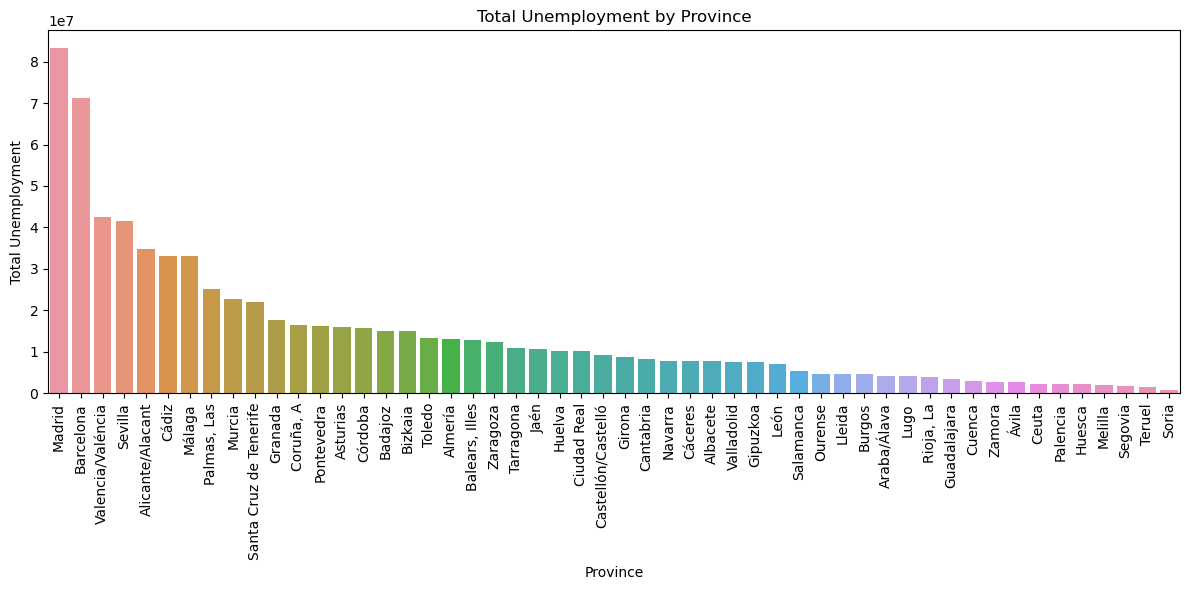

In [384]:
province_totals = paros.groupby('Province')['Total_unemployment'].sum().reset_index()

# Sort the provinces by the total unemployment in descending order
province_totals = province_totals.sort_values(by='Total_unemployment', ascending=False)


plt.figure(figsize=(12, 6))
sns.barplot(x='Province', y='Total_unemployment', data=province_totals)
plt.xticks(rotation=90)
plt.xlabel("Province")
plt.ylabel("Total Unemployment")
plt.title("Total Unemployment by Province")
plt.tight_layout()
plt.show()



In [385]:
## Total Unemployent by Industry within Provinces ## 

In [55]:
industries = ['Unemployment_agriculture', 'Unemployment_industry', 'Unemployment_construction', 'Unemployment_services', 'Unemployment_without_previous_employment']

grouped_dataa = paros.groupby('Province')[industries].sum().reset_index()


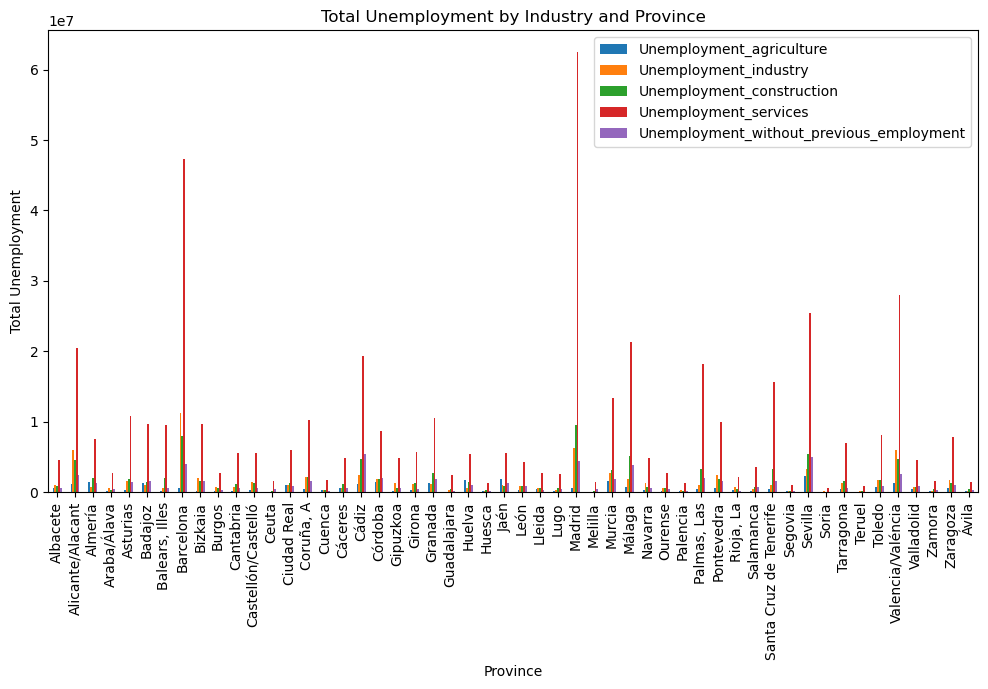

In [56]:
grouped_dataa.set_index('Province')[industries].plot(kind='bar', figsize=(12, 6))

# Set the title and labels for the plot
plt.title('Total Unemployment by Industry and Province')
plt.xlabel('Province')
plt.ylabel('Total Unemployment')

# Show the legend
plt.legend(loc='upper right')

# Show the plot
plt.show()

In [57]:
fig_stacked = px.bar(grouped_dataa, x='Province', y=industries, title='Total Unemployment by Industry and Province (Stacked Bar Chart)',
                     labels={'value': 'Total Unemployment', 'Province_column_name': 'Province'},
                     barmode='stack')

# Show the plot
fig_stacked.show()


In [58]:
fig_grouped = px.bar(grouped_dataa, x='Province', y=industries, title='Total Unemployment by Industry and Province (Grouped Bar Chart)',
                     labels={'value': 'Total Unemployment', 'Province_column_name': 'Province'},
                     barmode='group')

# Update the layout to place the labels at the bottom
fig_grouped.update_layout(
    xaxis_title='Province',
    yaxis_title='Total Unemployment',
    xaxis={'categoryorder': 'total descending'},
    yaxis_tickprefix='',
    yaxis_ticksuffix='',
    legend_title_text='Industry',
    barmode='group',
)

# Show the plot
fig_grouped.show()

In [59]:
#############################################################################################################################

C:\Users\ajvs1\AppData\Local\Temp\ipykernel_3880\862577440.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



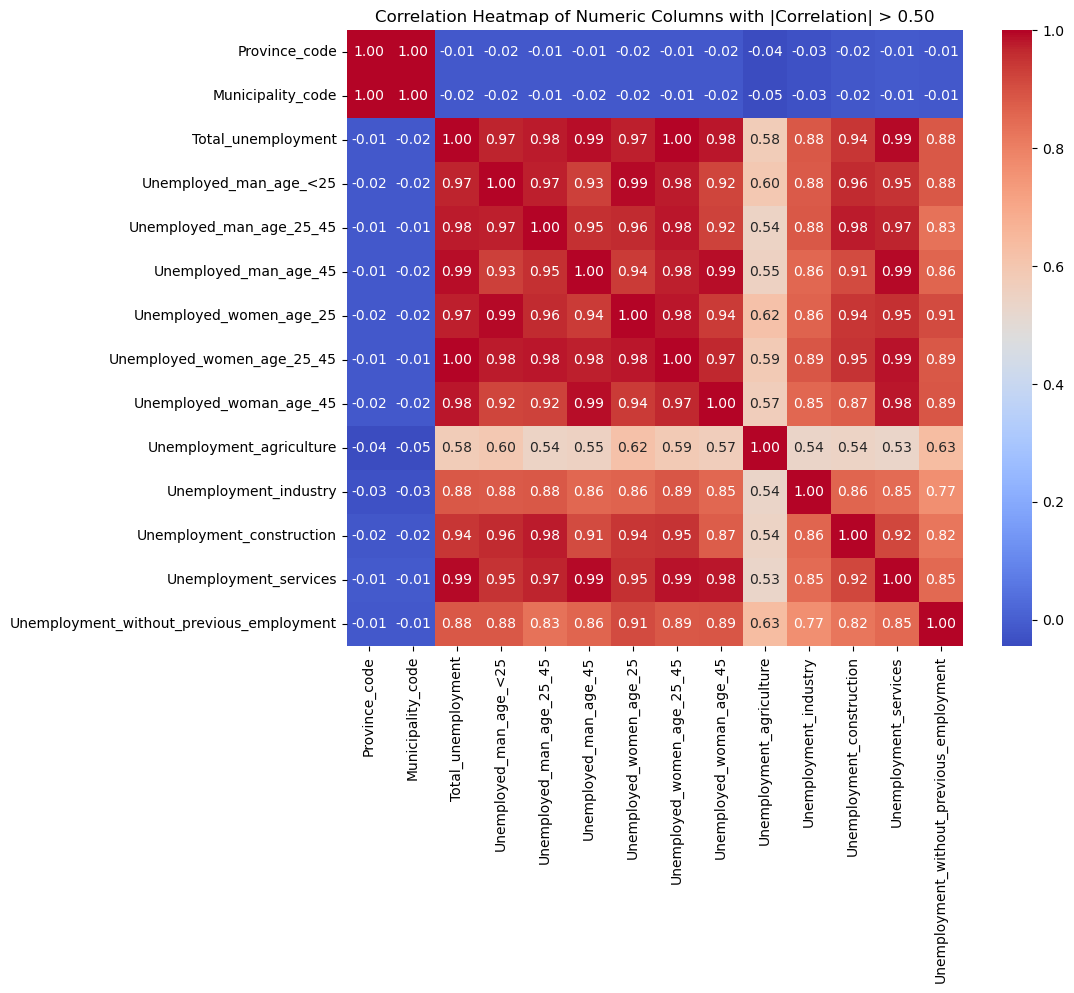

In [390]:
correlation_matrix = paros.corr()

# Mask diagonal and get columns with any correlation value greater than 0.50
columns_with_high_corr = correlation_matrix.columns[(correlation_matrix.mask(np.eye(correlation_matrix.shape[0], dtype=bool)).abs() > 0.50).any()]

# Filter the correlation matrix using these columns
filtered_corr_matrix = correlation_matrix.loc[columns_with_high_corr, columns_with_high_corr]

# Create the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(filtered_corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Heatmap of Numeric Columns with |Correlation| > 0.50')
plt.show()

#### Feature Engeneering to deal with  hihgly correlated columns

In [391]:
paros['Man'] = paros['Unemployed_man_age_<25'] + paros['Unemployed_man_age_25_45'] + paros['Unemployed_man_age_45']

# Sum the unemployed women for each row and store the result in a new column 'Women'
paros['Women'] = paros['Unemployed_women_age_25'] + paros['Unemployed_women_age_25_45'] + paros['Unemployed_woman_age_45']

In [392]:
## Calculation ratio by gender
paros['Ratio_men'] = paros['Man'] / paros['Total_unemployment']
paros['Ratio_women'] = paros['Women'] / paros['Total_unemployment']


In [393]:
industry_columns = [
    'Unemployment_agriculture', 
    'Unemployment_industry', 
    'Unemployment_construction', 
    'Unemployment_services', 
    'Unemployment_without_previous_employment'
]

# Calculate the ratio for each industry and create new columns
for column in industry_columns:
    ratio_column_name = 'Ratio_' + column.split('_')[1]
    paros[ratio_column_name] = paros[column] / paros['Total_unemployment']


In [394]:
columns_to_drop = ['AC_code', 'Province_code','Municipality_code','Unemployed_man_age_<25', 'Unemployed_man_age_25_45',
                   'Unemployed_man_age_45', 'Unemployed_women_age_25', 'Unemployed_women_age_25_45', 
                   'Unemployed_woman_age_45','Man', 'Women','Unemployment_agriculture',  'Unemployment_industry',
                   'Unemployment_construction', 'Unemployment_services', 'Unemployment_without_previous_employment']
paros = paros.drop(columns=columns_to_drop, axis=1)

In [395]:
paros.head()

,Date,Autonomus_Community,Province,Municipality,Total_unemployment,YearMonth,Ratio_men,Ratio_women,Ratio_agriculture,Ratio_industry,Ratio_construction,Ratio_services,Ratio_without
1,2006-01-01,Andalucía,Almería,Abla,56,2006-01,0.500000,0.500000,0.178571,0.107143,0.160714,0.482143,0.071429
2,2006-01-01,Andalucía,Almería,Abrucena,50,2006-01,0.680000,0.320000,0.140000,0.120000,0.140000,0.520000,0.080000
3,2006-01-01,Andalucía,Almería,Adra,775,2006-01,0.436129,0.563871,0.178065,0.046452,0.132903,0.581935,0.060645
4,2006-01-01,Andalucía,Almería,Albánchez,14,2006-01,0.714286,0.285714,0.071429,0.428571,0.142857,0.285714,0.071429
5,2006-01-01,Andalucía,Almería,Alboloduy,24,2006-01,0.333333,0.666667,0.041667,0.041667,0.208333,0.583333,0.125000


C:\Users\ajvs1\AppData\Local\Temp\ipykernel_3880\2138587268.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



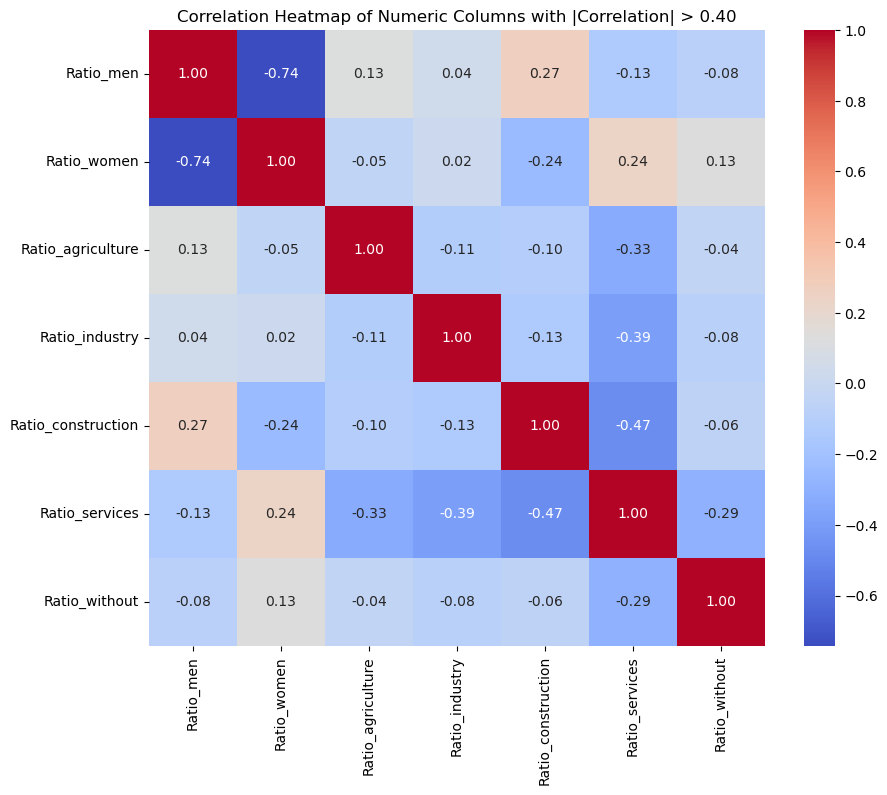

In [396]:
correlation_matrix = paros.corr()

# Mask diagonal and get columns with any correlation value greater than 0.50
columns_with_high_corr = correlation_matrix.columns[(correlation_matrix.mask(np.eye(correlation_matrix.shape[0], dtype=bool)).abs() > 0.20).any()]

# Filter the correlation matrix using these columns
filtered_corr_matrix = correlation_matrix.loc[columns_with_high_corr, columns_with_high_corr]

# Create the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(filtered_corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Heatmap of Numeric Columns with |Correlation| > 0.40')
plt.show()


In [397]:
columns_to_drop = ['Ratio_men','Ratio_women']
paros = paros.drop(columns=columns_to_drop, axis=1)

## The focus of this project at a Province Level

##### Grouping Data by Province for more detailed analysis 

In [221]:
# This script groups the data in the 'paros' DataFrame by 'Date' and 'Province' columns, then calculates the sum for each group to analyze the total unemployment figures in each province over time.
# The reset_index function is used to convert the groupby indices ('Date' and 'Province') back into columns, facilitating further analysis and visualization of the data at the provincial level.

province_unemployment = paros.groupby(['Date', 'Province']).sum().reset_index()


C:\Users\ajvs1\AppData\Local\Temp\ipykernel_3880\692905721.py:4: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [222]:
province_unemployment.tail(20)

,Date,Province,Total_unemployment,Ratio_agriculture,Ratio_industry,Ratio_construction,Ratio_services,Ratio_without
10796,2023-04-01,Málaga,133410,8.753730,5.148429,15.030082,68.084568,8.624279
10797,2023-04-01,Navarra,30882,27.646209,62.033332,20.291899,185.223330,31.705679
10798,2023-04-01,Ourense,16119,6.964273,10.939035,8.483978,62.340845,6.477608
10799,2023-04-01,Palencia,7091,17.530841,23.523047,17.238701,119.992996,13.071874
10800,2023-04-01,"Palmas, Las",93118,0.917028,1.279385,2.840577,26.787099,2.280625
10801,2023-04-01,Pontevedra,54184,3.226313,7.744622,4.875088,41.893502,4.272319
10802,2023-04-01,"Rioja, La",14188,28.216664,35.052039,19.324368,101.542347,13.663348
10803,2023-04-01,Salamanca,18552,34.747356,36.132744,46.772019,277.571625,42.763487
10804,2023-04-01,Santa Cruz de Tenerife,86574,3.146953,1.852049,5.019034,40.301942,3.832226
10805,2023-04-01,Segovia,5535,31.848160,24.671392,10.388599,136.579342,22.788438


In [223]:
province_unemployment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10816 entries, 0 to 10815
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                10816 non-null  datetime64[ns]
 1   Province            10816 non-null  object        
 2   Total_unemployment  10816 non-null  int64         
 3   Ratio_agriculture   10816 non-null  float64       
 4   Ratio_industry      10816 non-null  float64       
 5   Ratio_construction  10816 non-null  float64       
 6   Ratio_services      10816 non-null  float64       
 7   Ratio_without       10816 non-null  float64       
dtypes: datetime64[ns](1), float64(5), int64(1), object(1)
memory usage: 676.1+ KB


####  Adding Macroeconomics Variables

In [224]:
GDP = pd.read_csv('GDP.csv', header=0)

In [225]:
GDP.tail()

,Date,GDP
755,2023-01-01,99.663375
756,2023-02-01,99.760127
757,2023-03-01,99.858451
758,2023-04-01,99.956836
759,2023-05-01,100.054527


In [226]:
GDP['Date'] = pd.to_datetime(GDP['Date'])

In [227]:
GDP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 760 entries, 0 to 759
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    760 non-null    datetime64[ns]
 1   GDP     760 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 12.0 KB


In [228]:
GDP['GDP'].describe()

count    760.000000
mean      99.999475
std        1.738491
min       83.188522
25%       99.501137
50%      100.112519
75%      100.902113
max      102.800048
Name: GDP, dtype: float64

In [229]:

last_date_paros = province_unemployment['Date'].max()

# Filter out rows from DataFrame B that are beyond the last date of DataFrame A
GDP_filtered = GDP[GDP['Date'] <= last_date_paros]

# Merge the two DataFrames
province_unemployment = pd.merge(province_unemployment, GDP_filtered, on='Date', how='left')

In [230]:
# Calculate a constant which is one more than the maximum GDP value in the dataset
constant = province_unemployment['GDP'].max() + 1

# Create a new column 'Inverted_GDP' which is the inversion of the 'GDP' column with respect to the constant
province_unemployment['Inverted_GDP'] = constant - province_unemployment['GDP']

# Create a new column 'Log_Transformed_GDP' by applying a logarithm transformation to the 'Inverted_GDP' column
# This can help in achieving a more normal distribution and potentially stabilize variances
province_unemployment['Log_Transformed_GDP'] = np.log(province_unemployment['Inverted_GDP'])

In [231]:
## Interest Rate

In [232]:
IR = pd.read_csv('Interest Rates.csv', header=0)

In [233]:
IR.tail()

,Date,Interest Rates
518,2023-03-01,3.443087
519,2023-04-01,3.408167
520,2023-05-01,3.413727
521,2023-06-01,3.400000
522,2023-07-01,3.500000


In [234]:
IR['Date'] = pd.to_datetime(IR['Date'])

In [235]:
IR.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 523 entries, 0 to 522
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            523 non-null    datetime64[ns]
 1   Interest Rates  523 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 8.3 KB


In [236]:
IR['Interest Rates'].describe()

count    523.000000
mean       7.276078
std        5.134971
min        0.042182
25%        3.740214
50%        5.231100
75%       11.843717
max       18.110000
Name: Interest Rates, dtype: float64

In [237]:

last_date_paros = paros['Date'].max()

# Filter out rows from DataFrame B that are beyond the last date of DataFrame A
IR_filtered = IR[IR['Date'] <= last_date_paros]

# Merge the two DataFrames
province_unemployment = pd.merge(province_unemployment, IR_filtered, on='Date', how='left')

In [238]:
## Europe Economic Policy Uncertainty Index

In [239]:
epuie = pd.read_csv('Economic Policy Uncertainty Index for Europe.csv', header=0)

In [240]:
epuie.tail()

,Date,Europe Economic Policy Uncertainty Index
433,2023-02-01,272.40225
434,2023-03-01,324.77328
435,2023-04-01,244.23158
436,2023-05-01,266.59680
437,2023-06-01,228.76195


In [241]:
epuie['Date'] = pd.to_datetime(epuie['Date'])

In [242]:
epuie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438 entries, 0 to 437
Data columns (total 2 columns):
 #   Column                                    Non-Null Count  Dtype         
---  ------                                    --------------  -----         
 0   Date                                      438 non-null    datetime64[ns]
 1   Europe Economic Policy Uncertainty Index  438 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 7.0 KB


In [243]:
epuie['Europe Economic Policy Uncertainty Index'].describe()

count    438.000000
mean     141.864671
std       76.418709
min       33.791030
25%       83.095025
50%      117.454160
75%      187.043145
max      433.277500
Name: Europe Economic Policy Uncertainty Index, dtype: float64

In [244]:

last_date_paros = paros['Date'].max()

# Filter out rows from DataFrame B that are beyond the last date of DataFrame A
epuie_filtered = epuie[epuie['Date'] <= last_date_paros]

# Merge the two DataFrames
province_unemployment = pd.merge(province_unemployment, epuie_filtered, on='Date', how='left')

In [245]:
## Consumer Price Index

In [246]:
CPI = pd.read_csv('Consumer Price Index All Items Total Total for Spain.csv', header=0)

In [247]:
CPI.tail()

,Date,Consumer Price Index
757,2023-02-01,0.943758
758,2023-03-01,0.368554
759,2023-04-01,0.595801
760,2023-05-01,-0.048312
761,2023-06-01,0.568390


In [248]:
CPI['Date'] = pd.to_datetime(CPI['Date'])

In [249]:
CPI.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 762 entries, 0 to 761
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Date                  762 non-null    datetime64[ns]
 1   Consumer Price Index  762 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 12.0 KB


In [250]:
last_date_paros = paros['Date'].max()

# Filter out rows from DataFrame B that are beyond the last date of DataFrame A
CPI_filtered = CPI[CPI['Date'] <= last_date_paros]

# Merge the two DataFrames
province_unemployment = pd.merge(province_unemployment, CPI_filtered, on='Date', how='left')

In [251]:
CPI['Consumer Price Index'].describe()

count    762.000000
mean       0.501843
std        0.718174
min       -1.907904
25%        0.086451
50%        0.373955
75%        0.899463
max        4.582091
Name: Consumer Price Index, dtype: float64

In [252]:
## Currency Conversions US$ Exchange Rate

In [253]:
ER = pd.read_csv('Currency Conversions US$ Exchange Rate.csv', header=0)

In [254]:
# Convert 'date' column to desired format
ER['Date'] = pd.to_datetime(ER['Date'])

In [255]:
ER['Currency Conversions US$ Exchange Rate'].describe()

count    763.000000
mean       0.675666
std        0.229872
min        0.335181
25%        0.420582
50%        0.733006
75%        0.856161
max        1.171642
Name: Currency Conversions US$ Exchange Rate, dtype: float64

In [256]:
ER.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 763 entries, 0 to 762
Data columns (total 2 columns):
 #   Column                                  Non-Null Count  Dtype         
---  ------                                  --------------  -----         
 0   Date                                    763 non-null    datetime64[ns]
 1   Currency Conversions US$ Exchange Rate  763 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 12.0 KB


In [257]:
ER.head()

,Date,Currency Conversions US$ Exchange Rate
0,1960-01-01,0.361903
1,1960-02-01,0.361511
2,1960-03-01,0.361250
3,1960-04-01,0.361250
4,1960-05-01,0.361337


In [258]:
ER.tail()

,Date,Currency Conversions US$ Exchange Rate
758,2023-03-01,0.933656
759,2023-04-01,0.912053
760,2023-05-01,0.921130
761,2023-06-01,0.922432
762,2023-07-01,0.904549


In [259]:
last_date_paros = paros['Date'].max()

# Filter out rows from DataFrame B that are beyond the last date of DataFrame A
ER_filtered = ER[ER['Date'] <= last_date_paros]

# Merge the two DataFrames
province_unemployment = pd.merge(province_unemployment, ER_filtered, on='Date', how='left')

In [260]:
## Economic Policy Uncertainty Index

In [261]:
EPU = pd.read_csv('Economic Policy Uncertainty Index for Spain.csv', header=0)

In [262]:
# Convert 'date' column to desired format
EPU['Date'] = pd.to_datetime(EPU['Date'])

In [263]:
EPU['Economic Policy Uncertainty Index'].describe()

count    210.000000
mean     119.975442
std       48.689632
min       23.317520
25%       83.931960
50%      118.601825
75%      147.611705
max      282.247960
Name: Economic Policy Uncertainty Index, dtype: float64

In [264]:
EPU.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 2 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   Date                               210 non-null    datetime64[ns]
 1   Economic Policy Uncertainty Index  210 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.4 KB


In [265]:
EPU.tail()

,Date,Economic Policy Uncertainty Index
205,2023-02-01,110.74117
206,2023-03-01,170.69412
207,2023-04-01,84.98883
208,2023-05-01,134.03751
209,2023-06-01,124.39638


In [266]:
last_date_paros = paros['Date'].max()

# Filter out rows from DataFrame B that are beyond the last date of DataFrame A
EPU_filtered = EPU[EPU['Date'] <= last_date_paros]

# Merge the two DataFrames
province_unemployment = pd.merge(province_unemployment, EPU_filtered, on='Date', how='left')

In [267]:
province_unemployment.duplicated(subset=['Date', 'Province']).any()


False

The result being False is a good sign. It means that, although you have multiple rows with the same date, each row represents data for a different province. Essentially, you don't have any true duplicate rows where both the date and province are the same.

In [268]:
## Production Construction Total

In [269]:
PC = pd.read_csv('Production Construction Total.csv', header=0)

In [270]:
# Convert 'date' column to desired format
PC['Date'] = pd.to_datetime(PC['Date'])

In [271]:
PC.tail()

,Date,Production Construction Total
204,2023-01-01,80.153053
205,2023-02-01,81.151223
206,2023-03-01,81.849942
207,2023-04-01,82.049576
208,2023-05-01,82.349027


In [272]:
last_date_paros = paros['Date'].max()

 #Filter out rows from DataFrame B that are beyond the last date of DataFrame A
PC_filtered = PC[PC['Date'] <= last_date_paros]

# Merge the two DataFrames
province_unemployment = pd.merge(province_unemployment, PC_filtered, on='Date', how='left')

In [273]:
## Production Industry Total Excluding Construction

In [274]:
PT = pd.read_csv('Production Industry Total Excluding Construction.csv', header=0)

In [275]:
## Convert 'date' column to desired format
PT['Date'] = pd.to_datetime(PT['Date'])

In [276]:
PT.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 2 columns):
 #   Column                                      Non-Null Count  Dtype         
---  ------                                      --------------  -----         
 0   Date                                        209 non-null    datetime64[ns]
 1   Production Industry Excluding Construction  209 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.4 KB


In [277]:
last_date_paros = paros['Date'].max()

# Filter out rows from DataFrame B that are beyond the last date of DataFrame A
PT_filtered = PT[PT['Date'] <= last_date_paros]

# Merge the two DataFrames
province_unemployment = pd.merge(province_unemployment, PT_filtered, on='Date', how='left')

In [278]:
PT['Production Industry Excluding Construction'].describe()

count    209.000000
mean     106.933735
std       11.876451
min       70.178058
25%      100.685084
50%      104.610087
75%      106.282089
max      136.260114
Name: Production Industry Excluding Construction, dtype: float64

In [279]:
PT.tail()

,Date,Production Industry Excluding Construction
204,2023-01-01,105.562088
205,2023-02-01,106.129088
206,2023-03-01,107.508090
207,2023-04-01,105.493088
208,2023-05-01,106.165088


In [280]:
## Checking for duplicates after adding new features

In [281]:
province_unemployment.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
10811    False
10812    False
10813    False
10814    False
10815    False
Length: 10816, dtype: bool

In [282]:
province_unemployment[province_unemployment.duplicated()].shape

(0, 18)

In [283]:
## Checking for Missing Values
province_unemployment.isna().sum(axis =0)

Date                                          0
Province                                      0
Total_unemployment                            0
Ratio_agriculture                             0
Ratio_industry                                0
Ratio_construction                            0
Ratio_services                                0
Ratio_without                                 0
GDP                                           0
Inverted_GDP                                  0
Log_Transformed_GDP                           0
Interest Rates                                0
Europe Economic Policy Uncertainty Index      0
Consumer Price Index                          0
Currency Conversions US$ Exchange Rate        0
Economic Policy Uncertainty Index             0
Production Construction Total                 0
Production Industry Excluding Construction    0
dtype: int64

In [153]:
### Heatmap with .050 treshold with new features

C:\Users\ajvs1\AppData\Local\Temp\ipykernel_3880\1762393824.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



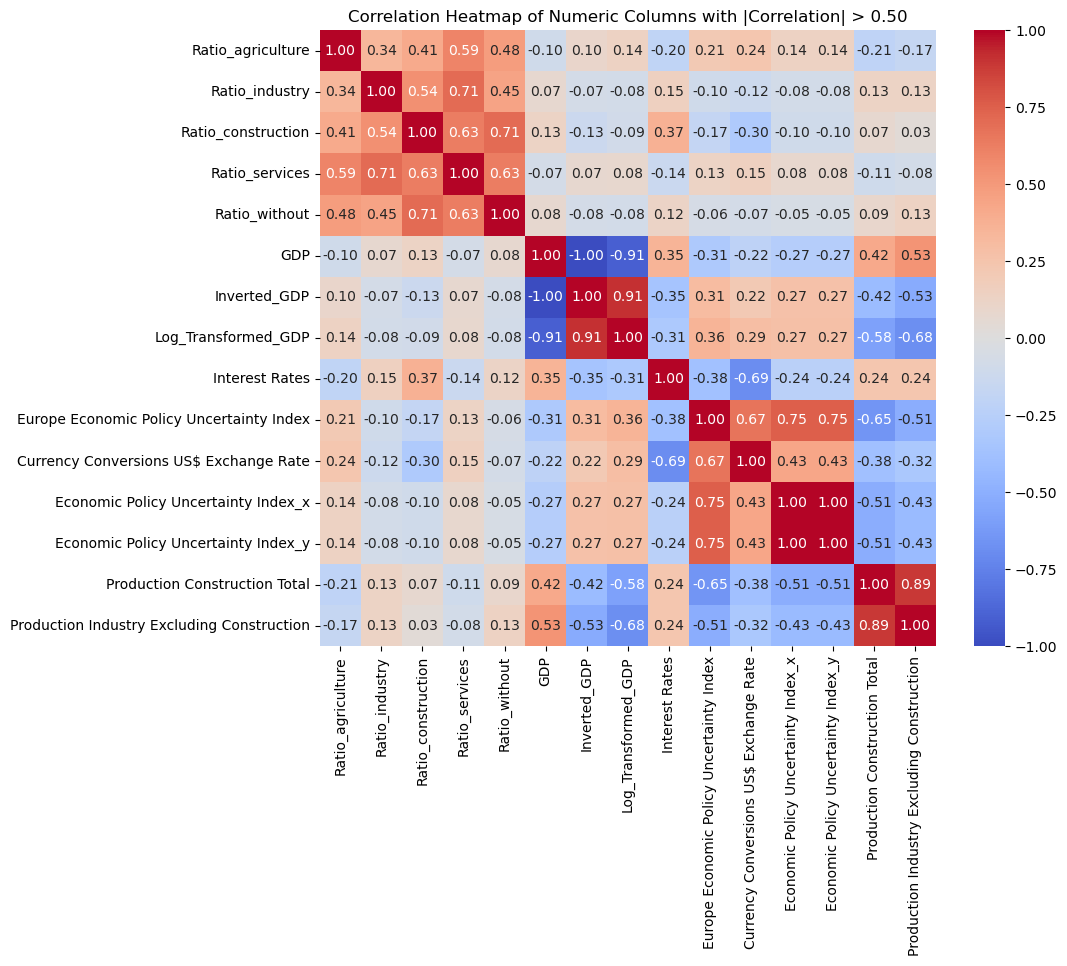

In [154]:
correlation_matrix = province_unemployment.corr()

# Mask diagonal and get columns with any correlation value greater than 0.50
columns_with_high_corr = correlation_matrix.columns[(correlation_matrix.mask(np.eye(correlation_matrix.shape[0], dtype=bool)).abs() > 0.50).any()]

# Filter the correlation matrix using these columns
filtered_corr_matrix = correlation_matrix.loc[columns_with_high_corr, columns_with_high_corr]

# Create the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(filtered_corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Heatmap of Numeric Columns with |Correlation| > 0.50')
plt.show()


In [284]:
columns_to_drop = ['Ratio_agriculture','Ratio_industry','Ratio_construction','Ratio_services','Ratio_without', 'Production Industry Excluding Construction','Europe Economic Policy Uncertainty Index','Inverted_GDP','GDP']
province_unemployment = province_unemployment.drop(columns=columns_to_drop, axis=1)

In [398]:
province_unemployment.head()

,Date,Province,Total_unemployment,Log_Transformed_GDP,Interest Rates,Consumer Price Index,Currency Conversions US$ Exchange Rate,Economic Policy Uncertainty Index,Production Construction Total
0,2006-01-01,Albacete,25275,1.291636,3.330591,-0.405998,0.825231,80.97429,190.251206
1,2006-01-01,Alicante/Alacant,85665,1.291636,3.330591,-0.405998,0.825231,80.97429,190.251206
2,2006-01-01,Almería,24570,1.291636,3.330591,-0.405998,0.825231,80.97429,190.251206
3,2006-01-01,Araba/Álava,12288,1.291636,3.330591,-0.405998,0.825231,80.97429,190.251206
4,2006-01-01,Asturias,59953,1.291636,3.330591,-0.405998,0.825231,80.97429,190.251206


C:\Users\ajvs1\AppData\Local\Temp\ipykernel_3880\3411567979.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



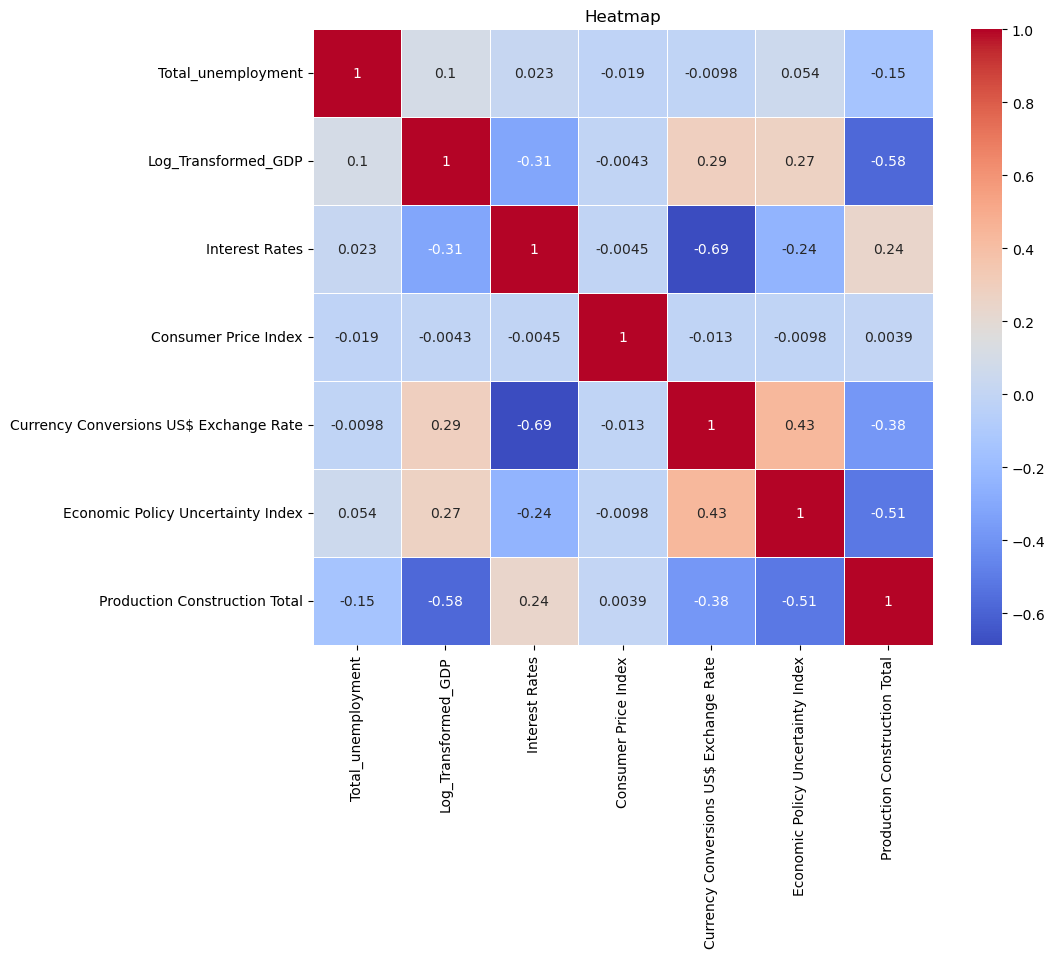

In [400]:
correlation_matrix = province_unemployment.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap')
plt.show()

In [287]:
province_unemployment.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10816 entries, 0 to 10815
Data columns (total 9 columns):
 #   Column                                  Non-Null Count  Dtype         
---  ------                                  --------------  -----         
 0   Date                                    10816 non-null  datetime64[ns]
 1   Province                                10816 non-null  object        
 2   Total_unemployment                      10816 non-null  int64         
 3   Log_Transformed_GDP                     10816 non-null  float64       
 4   Interest Rates                          10816 non-null  float64       
 5   Consumer Price Index                    10816 non-null  float64       
 6   Currency Conversions US$ Exchange Rate  10816 non-null  float64       
 7   Economic Policy Uncertainty Index       10816 non-null  float64       
 8   Production Construction Total           10816 non-null  float64       
dtypes: datetime64[ns](1), float64(6), int64(1), object(

In [286]:
## We proceed to save the work at this point. Using this csv file, we can be able to run Models in the next notebooks
province_unemployment.to_csv('province_unemployment.csv', index=False)


In [ ]:
#############################################################################################################################

In [ ]:
#############################################################################################################################

# References

#### Source link : https://datos.gob.es/es/catalogo/ea0021425-paro-registrado-por-municipios
- Unemplyoment Data 2006-2023

#### Source Link: https://data.worldbank.org/indicator/NY.GDP.MKTP.CD?end=2022&locations=ES&start=2006&view=chart
#### Source Link: https://fred.stlouisfed.org/searchresults?st=spain
- Macroeconomical Variables